| **Inicio** | **atrás 9** | **Siguiente 11** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./9_Machine_Learning.ipynb)| [⏩](./11_Machine_Learning.ipynb)

# **91. Hiperparámetros de AdaBoost | GridSearchCV en Adaboost**

Los hiperparámetros en el algoritmo AdaBoost incluyen el número de clasificadores débiles (`n_estimators`) y el tipo de clasificador débil utilizado (`base_estimator`). También se pueden considerar otros hiperparámetros específicos de AdaBoost, como la tasa de aprendizaje (`learning_rate`). Vamos a explorar cómo ajustar estos hiperparámetros utilizando `GridSearchCV` en scikit-learn.

Primero, asegúrate de tener las siguientes bibliotecas instaladas:

```bash
pip install numpy scikit-learn matplotlib
```

Ahora, aquí hay un ejemplo de cómo realizar una búsqueda de cuadrícula para ajustar los hiperparámetros de AdaBoost:

Mejores hiperparámetros: {'learning_rate': 0.1, 'n_estimators': 150}
Precisión del modelo en el conjunto de prueba: 0.86


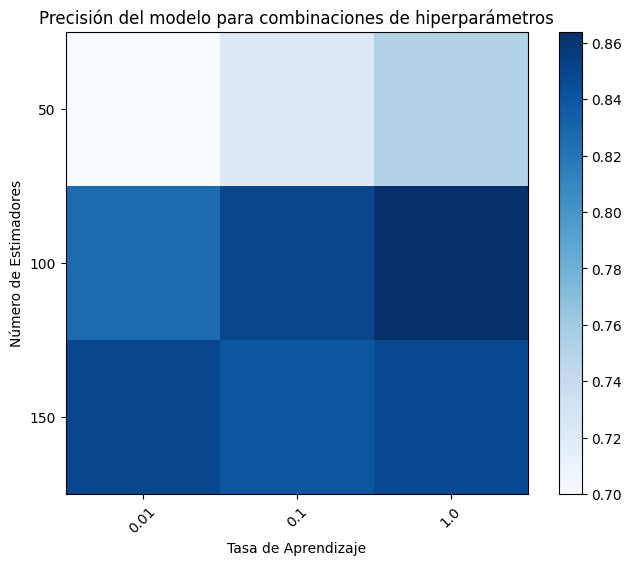

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos sintético
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el clasificador base (clasificador débil)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Definir el clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier(base_classifier)

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Inicializar el objeto GridSearchCV
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda en la cuadrícula utilizando los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy}")

# Visualización del rendimiento en la cuadrícula
results = grid_search.cv_results_
n_estimators_values = param_grid['n_estimators']
learning_rate_values = param_grid['learning_rate']

accuracy_matrix = np.array(results['mean_test_score']).reshape(len(n_estimators_values), len(learning_rate_values))

plt.figure(figsize=(8, 6))
plt.imshow(accuracy_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Precisión del modelo para combinaciones de hiperparámetros')
plt.xlabel('Tasa de Aprendizaje')
plt.ylabel('Número de Estimadores')
plt.colorbar()

plt.xticks(np.arange(len(learning_rate_values)), learning_rate_values, rotation=45)
plt.yticks(np.arange(len(n_estimators_values)), n_estimators_values)

plt.show()

En este ejemplo:

- Creamos un conjunto de datos sintético usando `make_classification`.
- Dividimos los datos en conjuntos de entrenamiento y prueba.
- Definimos el clasificador base (clasificador débil) como un árbol de decisión con profundidad máxima 1.
- Definimos el clasificador AdaBoost con el clasificador base.
- Definimos una cuadrícula de hiperparámetros para explorar (`n_estimators` y `learning_rate`).
- Utilizamos `GridSearchCV` para encontrar la mejor combinación de hiperparámetros en el conjunto de entrenamiento.
- Visualizamos la precisión del modelo para diferentes combinaciones de hiperparámetros.

Esta visualización te ayudará a comprender cómo cambia el rendimiento del modelo con diferentes valores de `n_estimators` y `learning_rate`. Puedes adaptar este código a tus propios conjuntos de datos y problemas específicos.

# **92. Bagging Vs Boosting, ¿Cuál es la diferencia entre Bagging y Boosting?**

**Bagging (Bootstrap Aggregating):**

**Definición:**
Bagging es una técnica de ensamblado que combina múltiples modelos de aprendizaje, entrenados en diferentes subconjuntos del conjunto de datos original, para mejorar la robustez y la generalización del modelo. La idea central es entrenar varios modelos independientes y combinar sus predicciones de alguna manera.

**Pasos Principales:**
1. **Muestreo con reemplazo (Bootstrap):** Se generan múltiples subconjuntos del conjunto de datos original mediante el muestreo con reemplazo (bootstrap).
2. **Entrenamiento Independiente:** Se entrena un modelo base (clasificador o regresor) en cada uno de estos subconjuntos.
3. **Promedio o Votación:** Las predicciones de cada modelo se combinan mediante promedio (en el caso de regresión) o votación (en el caso de clasificación).

**Ejemplo de Código con Bagging:**

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier()

# Definir el clasificador Bagging
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Entrenar el modelo Bagging
bagging_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_classifier.predict(X_test)

# Calcular la precisión del modelo Bagging
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Bagging: {accuracy}')

Precisión del modelo Bagging: 1.0


**Boosting:**

**Definición:**
Boosting es otra técnica de ensamblado que se centra en mejorar la precisión de los modelos débiles (clasificadores débiles o regresores débiles) mediante la construcción secuencial de modelos, dando más peso a las instancias clasificadas incorrectamente en cada iteración.

**Pasos Principales:**
1. **Entrenamiento Secuencial:** Se entrena un clasificador débil en el conjunto de datos, y se asignan pesos a las instancias, dándole más peso a las instancias clasificadas incorrectamente.
2. **Pesos en las Instancias:** Se ajustan los pesos de las instancias para que las instancias clasificadas incorrectamente tengan más probabilidad de ser seleccionadas en la siguiente iteración.
3. **Combinación Ponderada:** Los clasificadores débiles se combinan de manera ponderada para formar un modelo fuerte.

**Ejemplo de Código con Boosting (AdaBoost):**

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el clasificador base (árbol de decisión)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Definir el clasificador Boosting (AdaBoost)
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Entrenar el modelo Boosting (AdaBoost)
adaboost_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifier.predict(X_test)

# Calcular la precisión del modelo Boosting (AdaBoost)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo Boosting (AdaBoost): {accuracy}')

Precisión del modelo Boosting (AdaBoost): 1.0


**Diferencias Clave:**
- Bagging entrena modelos de manera independiente, mientras que Boosting entrena modelos de manera secuencial, dando más peso a las instancias clasificadas incorrectamente.
- Bagging reduce la varianza al promediar o votar las predicciones de modelos independientes, mientras que Boosting mejora la precisión al enfocarse en las instancias más difíciles de clasificar.
- Ejemplos comunes de Bagging incluyen Random Forest, mientras que AdaBoost es un ejemplo común de Boosting.

**Visualización:**
Puedes visualizar la diferencia en el rendimiento entre Bagging y Boosting observando cómo evolucionan las curvas de aprendizaje y las fronteras de decisión a medida que se entrenan más modelos en cada técnica. La visualización puede incluir gráficos de precisión o representaciones gráficas de las fronteras de decisión.

# **93. Algoritmo de agrupamiento de K-Means, Intuición geométrica, Agrupación, Aprendizaje sin supervisión**

**Algoritmo de Agrupamiento K-Means:**

**Intuición Geométrica:**
El algoritmo K-Means es un algoritmo de agrupamiento que divide un conjunto de datos en grupos (clústeres) basándose en la similitud entre las instancias. La intuición geométrica detrás de K-Means implica asignar cada punto de datos al clúster cuyo centroide está más cerca. Los centroides son puntos que representan el centro de gravedad de los puntos en un clúster.

**Pasos Básicos del Algoritmo:**
1. **Inicialización de Centroides:** Seleccionar k puntos como centroides iniciales (donde k es el número de clústeres deseado).
2. **Asignación de Puntos a Clústeres:** Asignar cada punto de datos al clúster cuyo centroide está más cerca.
3. **Actualización de Centroides:** Calcular nuevos centroides como la media de todos los puntos asignados a cada clúster.
4. **Repetir Pasos 2-3:** Repetir los pasos de asignación y actualización hasta que la asignación de clústeres ya no cambie significativamente.

**Agrupación y Aprendizaje sin Supervisión:**
K-Means es un ejemplo de aprendizaje sin supervisión, ya que no requiere etiquetas para entrenar el modelo. El objetivo es descubrir patrones o estructuras intrínsecas en los datos mediante el agrupamiento.

**Ejemplo de Código y Visualización con Scikit-Learn:**

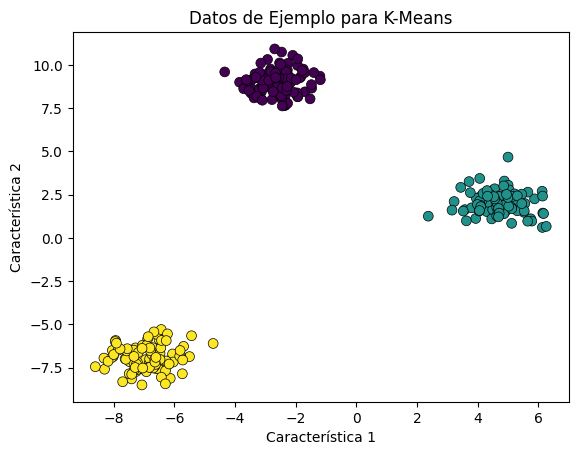

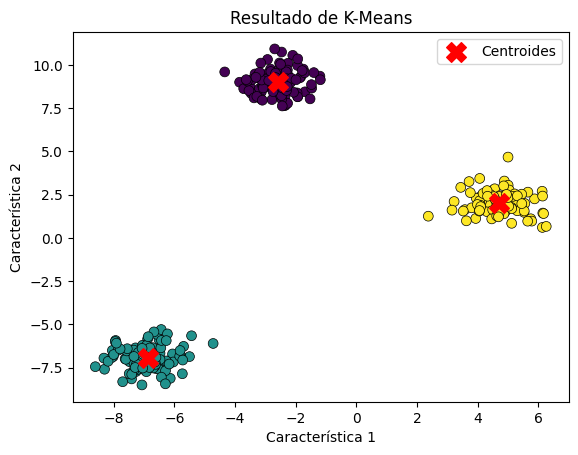

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos con 3 clústeres
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=0.70)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)
plt.title('Datos de Ejemplo para K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X)

# Obtener las etiquetas de clúster y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Resultado de K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

En este ejemplo:
- Se generan datos sintéticos con 3 clústeres usando `make_blobs` de scikit-learn.
- Se visualizan los datos para observar la estructura.
- Se aplica el algoritmo K-Means con `n_clusters=3`.
- Se visualizan los resultados, mostrando los puntos de datos coloreados por clúster y los centroides marcados en rojo.

La visualización final muestra cómo K-Means ha agrupado los datos en tres clústeres y ha calculado los centroides correspondientes. Este es un ejemplo básico, pero K-Means es ampliamente utilizado en tareas de agrupamiento en diversas aplicaciones.

# **94. Algoritmo de agrupamiento de K-Means en Python | Ejemplo práctico | Ejemplo de agrupación de estudiantes | aprender**

Aquí te dejo un ejemplo práctico del algoritmo de agrupamiento K-Means en Python utilizando datos de estudiantes. En este ejemplo, imaginemos que tenemos información sobre el rendimiento académico de los estudiantes en dos materias diferentes y queremos agrupar a los estudiantes en clústeres según su desempeño en estas materias.

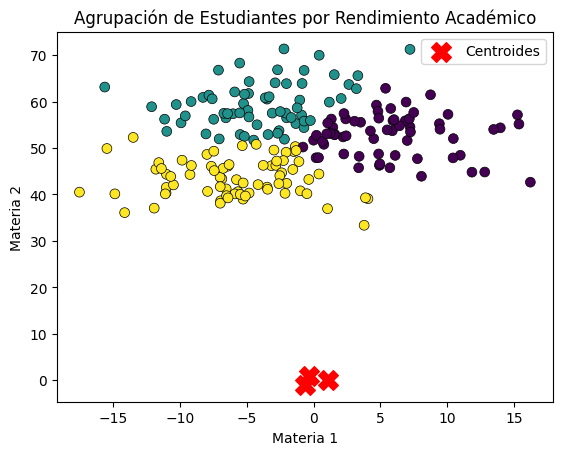

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Crear datos sintéticos de estudiantes con rendimiento académico en dos materias
data, _ = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=5)
data[:, 1] = data[:, 1] + 50  # Ajustar la escala de la segunda materia

# Crear un DataFrame para facilitar el manejo de los datos
df = pd.DataFrame(data, columns=['Materia1', 'Materia2'])

# Escalar los datos para mejorar el rendimiento de K-Means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Aplicar K-Means con k=3 (suponiendo que hay tres niveles de rendimiento)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los resultados
plt.scatter(df['Materia1'], df['Materia2'], c=df['Cluster'], cmap='viridis', s=50, edgecolors='k', linewidth=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Agrupación de Estudiantes por Rendimiento Académico')
plt.xlabel('Materia 1')
plt.ylabel('Materia 2')
plt.legend()
plt.show()

En este ejemplo:

- Creamos datos sintéticos de estudiantes con rendimiento académico en dos materias utilizando `make_blobs`.
- Creamos un DataFrame de pandas para facilitar el manejo de los datos.
- Escalamos los datos utilizando `StandardScaler` para asegurarnos de que ambas materias tengan la misma influencia en el algoritmo K-Means.
- Aplicamos K-Means con `n_clusters=3` para agrupar a los estudiantes en tres niveles de rendimiento.
- Visualizamos los resultados, coloreando a los estudiantes según el clúster al que fueron asignados y marcando los centroides de los clústeres en rojo.

Este es un ejemplo sencillo para demostrar cómo aplicar K-Means en un escenario práctico. En un caso real, podrías tener más características y un conjunto de datos más grande. Además, la interpretación de los clústeres dependerá del contexto del problema.

# **95. Algoritmo de agrupación en clústeres K-Means desde cero en Python, Algoritmos de aprendizaje automático desde cero**

Crear el algoritmo K-Means desde cero en Python proporciona una excelente comprensión de cómo funciona internamente el algoritmo. Aquí hay una implementación básica del algoritmo K-Means en Python sin utilizar bibliotecas de aprendizaje automático.

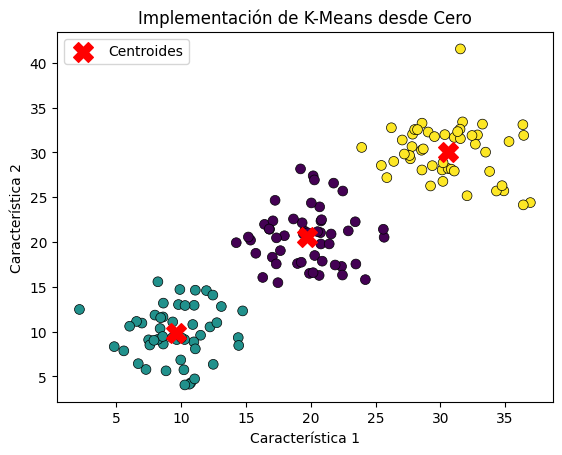

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def kmeans(X, k=3, max_iters=100):
    # Inicializar centroides de manera aleatoria
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Calcular las distancias entre cada punto y los centroides
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Asignar cada punto al clúster del centroide más cercano
        labels = np.argmin(distances, axis=1)

        # Actualizar los centroides como la media de los puntos en cada clúster
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        # Verificar la convergencia
        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Generar datos sintéticos para probar el algoritmo
np.random.seed(42)
data = np.concatenate([np.random.normal(loc=10, scale=3, size=(50, 2)),
                       np.random.normal(loc=20, scale=3, size=(50, 2)),
                       np.random.normal(loc=30, scale=3, size=(50, 2))])

# Aplicar K-Means
centroids, labels = kmeans(data, k=3)

# Visualizar resultados
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k', linewidth=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Implementación de K-Means desde Cero')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.show()

En este ejemplo:

- La función `kmeans` toma un conjunto de datos `X` y el número deseado de clústeres `k`.
- Inicializa los centroides de manera aleatoria.
- Itera hasta la convergencia o alcanza un número máximo de iteraciones.
- Asigna cada punto al clúster del centroide más cercano.
- Actualiza los centroides como la media de los puntos en cada clúster.
- Verifica la convergencia.
- Devuelve los centroides y las etiquetas de clúster.

El código incluye la generación de datos sintéticos para ilustrar el funcionamiento del algoritmo. La visualización muestra los puntos de datos coloreados según sus clústeres y los centroides marcados en rojo.

Esta implementación básica es educativa y puede no ser tan eficiente como las implementaciones en bibliotecas de aprendizaje automático como scikit-learn, pero proporciona una base sólida para entender el algoritmo K-Means.

# **96. Aumento de gradiente, ¿Cómo funciona el aumento de gradiente?**

**Aumento de Gradiente (Gradient Boosting):**

**Introducción:**
El aumento de gradiente es un algoritmo de aprendizaje automático supervisado utilizado para problemas de regresión y clasificación. Es un enfoque de conjunto que combina varios modelos más débiles para crear un modelo fuerte. A diferencia de los métodos de conjunto como el bosque aleatorio que construyen varios modelos independientes, el aumento de gradiente construye modelos de forma secuencial, cada uno corrigiendo los errores del modelo anterior.

**Funcionamiento Básico:**
El aumento de gradiente sigue el principio de construir modelos aditivos. En cada iteración, se agrega un nuevo modelo débil al conjunto para corregir los errores residuales del modelo actual. Los modelos débiles se denominan "árboles de decisión débiles" en el caso de la versión más común del aumento de gradiente, conocida como Gradient Boosted Trees.

**Pasos del Algoritmo:**
1. **Inicialización del Modelo:** Se inicia con un modelo simple, que puede ser un solo árbol de decisión.
2. **Cálculo de Residuos:** Se calculan los residuos entre las predicciones del modelo actual y las etiquetas verdaderas.
3. **Construcción de un Nuevo Modelo:** Se ajusta un nuevo modelo (árbol) a los residuos calculados en el paso anterior.
4. **Actualización del Modelo:** El nuevo modelo se agrega al conjunto con un factor de aprendizaje (learning rate) multiplicado para controlar la contribución del nuevo modelo.
5. **Repetición:** Los pasos 2-4 se repiten hasta que se alcanza un número predeterminado de modelos o hasta que se logra una convergencia satisfactoria.

**Ejemplo en Código y Visualización:**
Vamos a utilizar la biblioteca `scikit-learn` para ilustrar el aumento de gradiente con árboles de decisión débiles. En este ejemplo, consideraremos un problema de regresión.

Error cuadrático medio: 0.007864651181626133


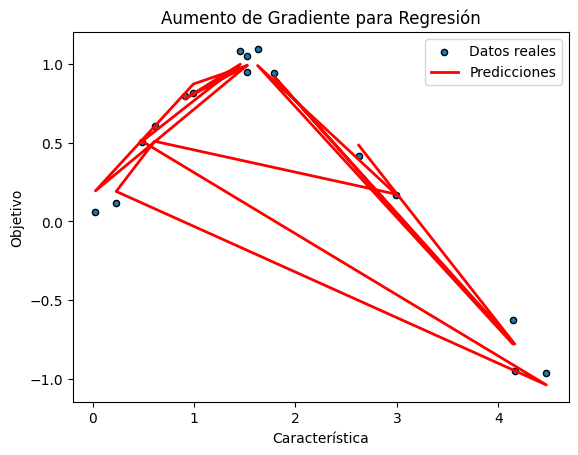

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Generar datos sintéticos
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de aumento de gradiente con árboles de decisión débiles
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Visualizar las predicciones y el modelo final
plt.scatter(X_test, y_test, s=20, edgecolors='k', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones', linewidth=2)
plt.title('Aumento de Gradiente para Regresión')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.legend()
plt.show()

En este ejemplo:
- Generamos datos sintéticos con una función senoidal y añadimos ruido.
- Dividimos los datos en conjuntos de entrenamiento y prueba.
- Inicializamos y entrenamos un modelo de aumento de gradiente con árboles de decisión débiles.
- Realizamos predicciones en el conjunto de prueba y evaluamos el rendimiento mediante el error cuadrático medio.
- Visualizamos las predicciones y el modelo final.

Este es un caso de regresión, pero el aumento de gradiente también se utiliza en problemas de clasificación. La clave es ajustar la cantidad de árboles (`n_estimators`) y la tasa de aprendizaje (`learning_rate`) para obtener un equilibrio entre rendimiento y generalización.

# **97. Regresión de aumento de gradiente, Matemáticas del aumento de gradiente**

**Regresión de Aumento de Gradiente: Matemáticas y Ejemplos en Código con Visualización**

**Matemáticas del Aumento de Gradiente para Regresión:**

El algoritmo de Aumento de Gradiente para regresión minimiza la función de pérdida en un espacio de funciones de modelos aditivos. Sea $F(x)$ la función objetivo que queremos aproximar, y $h(x)$ el modelo aditivo que estamos construyendo en cada iteración:

1. **Función Objetivo:**
   $F(x) = h_1(x) + h_2(x) + \ldots + h_m(x)$

2. **Minimización de la Función de Pérdida:**
   El objetivo es encontrar $h_m(x)$ en cada paso que minimice la función de pérdida. La función de pérdida comúnmente utilizada en regresión es el error cuadrático medio (MSE):
   $L(y, F(x)) = \frac{1}{2}(y - F(x))^2$

3. **Ajuste del Nuevo Modelo:**
   En cada iteración, ajustamos un nuevo modelo $h_m(x)$ al residuo entre las predicciones actuales y las etiquetas verdaderas:
   $h_m(x) = \text{argmin}_h \sum_{i=1}^{N} L(y_i, F_{m-1}(x_i) + h(x_i))$

4. **Actualizar el Modelo Aditivo:**
   Después de ajustar $h_m(x)$, actualizamos el modelo aditivo $F(x)$:
   $F_m(x) = F_{m-1}(x) + \alpha h_m(x)$

   Donde $(\alpha)$ es la tasa de aprendizaje que controla la contribución de cada nuevo modelo.

**Ejemplo en Código con Visualización:**

Usaremos la biblioteca `scikit-learn` para implementar la regresión de aumento de gradiente y visualizaremos los resultados.

Error cuadrático medio: 0.007864651181626133


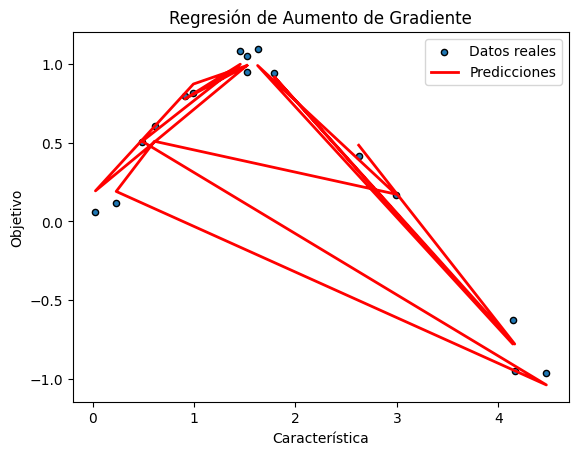

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Generar datos sintéticos
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de aumento de gradiente para regresión
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')

# Visualizar las predicciones y el modelo final
plt.scatter(X_test, y_test, s=20, edgecolors='k', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones', linewidth=2)
plt.title('Regresión de Aumento de Gradiente')
plt.xlabel('Característica')
plt.ylabel('Objetivo')
plt.legend()
plt.show()

En este ejemplo:
- Generamos datos sintéticos con una función senoidal y añadimos ruido.
- Dividimos los datos en conjuntos de entrenamiento y prueba.
- Inicializamos y entrenamos un modelo de aumento de gradiente para regresión.
- Realizamos predicciones en el conjunto de prueba y evaluamos el rendimiento mediante el error cuadrático medio.
- Visualizamos las predicciones y el modelo final.

Este es un caso de regresión, pero el aumento de gradiente también se utiliza en problemas de clasificación. La clave es ajustar la cantidad de árboles (`n_estimators`) y la tasa de aprendizaje (`learning_rate`) para obtener un equilibrio entre rendimiento y generalización.

# **98. Aumento de gradiente para clasificación, Intuición geométrica**

**Aumento de Gradiente para Clasificación: Intuición Geométrica**

**Introducción:**
El Aumento de Gradiente también es ampliamente utilizado para problemas de clasificación. Al igual que en el caso de regresión, el Aumento de Gradiente para clasificación sigue el principio de construir un modelo aditivo que minimiza una función de pérdida. En este caso, la función de pérdida comúnmente utilizada es la entropía cruzada (o la pérdida logarítmica).

**Intuición Geométrica:**
Imagina que estamos tratando de clasificar puntos en un plano en dos clases (clase 0 y clase 1). Cada modelo aditivo que añadimos en cada iteración es un clasificador débil, por ejemplo, un árbol de decisión con una sola división. La idea es corregir los errores de clasificación del modelo anterior, enfocándonos más en los puntos que han sido clasificados incorrectamente.

1. **Iniciar con un Modelo Simple:**
   Comenzamos con un modelo simple que divide el espacio de características en dos regiones.

2. **Calcular los Errores de Clasificación:**
   Calculamos los errores de clasificación y asignamos un peso mayor a los puntos mal clasificados.

3. **Construir un Nuevo Modelo:**
   Construimos un nuevo modelo que se enfoca en clasificar correctamente los puntos mal clasificados. Este nuevo modelo se agrega al modelo existente.

4. **Actualizar el Modelo Aditivo:**
   Actualizamos el modelo aditivo sumando el nuevo modelo con un factor de aprendizaje.

5. **Repetir el Proceso:**
   Repetimos el proceso, añadiendo modelos adicionales para corregir los errores restantes.

**Ejemplo en Código con Visualización:**
Vamos a utilizar la biblioteca `scikit-learn` para implementar el Aumento de Gradiente para clasificación y visualizaremos los resultados.

Precisión del modelo: 0.92


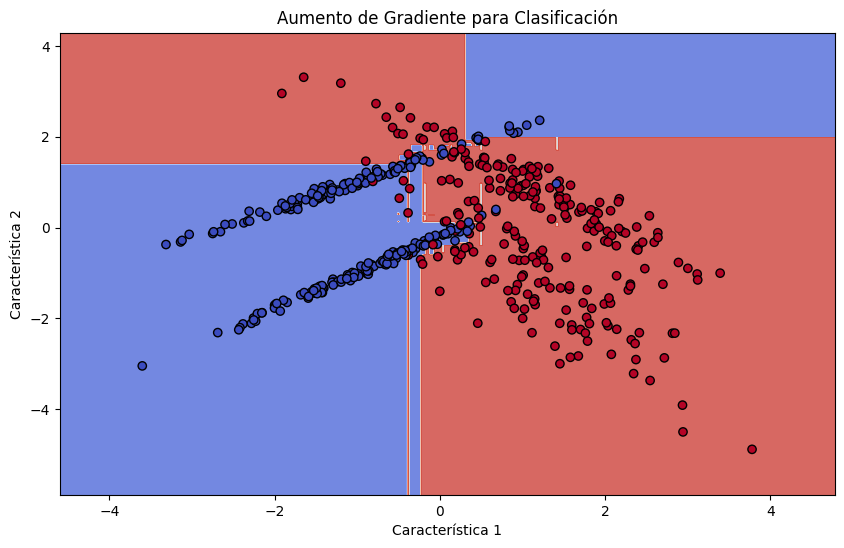

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Función para visualizar la frontera de decisión
def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')

# Generar datos sintéticos para clasificación
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Inicializar el modelo de aumento de gradiente para clasificación
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Visualizar la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_boundary(model, X, y)
plt.title('Aumento de Gradiente para Clasificación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

En este ejemplo:
- Generamos datos sintéticos para clasificación.
- Inicializamos y entrenamos un modelo de aumento de gradiente para clasificación.
- Realizamos predicciones en el conjunto de prueba y evaluamos la precisión del modelo.
- Visualizamos la frontera de decisión del modelo en el espacio de características.

Este es un caso de clasificación binaria, pero el Aumento de Gradiente también se puede aplicar a problemas de clasificación multiclase. La clave es ajustar la cantidad de árboles (`n_estimators`) y la tasa de aprendizaje (`learning_rate`) para obtener un equilibrio entre rendimiento y generalización.

# **99. Conjuntos de apilamiento y combinación**

**Conjuntos de Apilamiento y Combinación en Aprendizaje Automático**

**Introducción:**

Los conjuntos de modelos son estrategias poderosas en aprendizaje automático para mejorar el rendimiento y la robustez de los modelos predictivos. Los conjuntos de apilamiento y combinación son dos enfoques populares que aprovechan la diversidad de modelos para obtener mejores resultados.

**Conjuntos de Apilamiento (Stacking):**

En el ensamblado de modelos de apilamiento, se entrenan múltiples modelos de nivel base y un modelo de nivel superior que aprende a combinar las predicciones de los modelos base. La idea es capturar patrones más complejos y relaciones no lineales al combinar las fortalezas de diferentes modelos.

1. **Entrenamiento de Modelos de Nivel Base:**
   - Se entrenan varios modelos independientes con diferentes algoritmos o configuraciones.
   - Cada modelo base produce predicciones para un conjunto de datos.

2. **Creación del Conjunto de Datos de Nivel Superior:**
   - Las predicciones del conjunto de datos original y las predicciones de los modelos base se combinan en un nuevo conjunto de datos.

3. **Entrenamiento del Modelo de Nivel Superior (Meta-Modelo):**
   - Se entrena un modelo de nivel superior (meta-modelo) con el nuevo conjunto de datos.
   - El meta-modelo aprende a combinar las predicciones de los modelos base.

4. **Predicciones Finales:**
   - Las nuevas instancias se pasan a través de los modelos base para obtener predicciones individuales.
   - Estas predicciones se combinan usando el meta-modelo para obtener la predicción final.

**Ejemplo de Stacking en Código:**

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.classifier import StackingClassifier
from sklearn.datasets import make_classification

# Generar datos sintéticos para clasificación
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelos de nivel base
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Inicializar modelo de nivel superior (meta-modelo)
lr_model = LogisticRegression()

# Inicializar clasificador de apilamiento
stacking_model = StackingClassifier(classifiers=[rf_model, gb_model], meta_classifier=lr_model)

# Entrenar modelos
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
stacking_model.fit(X_train, y_train)

# Realizar predicciones
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)

# Evaluar el rendimiento
print(f'Precisión del RandomForest: {accuracy_score(y_test, rf_pred)}')
print(f'Precisión del GradientBoosting: {accuracy_score(y_test, gb_pred)}')
print(f'Precisión del Stacking: {accuracy_score(y_test, stacking_pred)}')

Precisión del RandomForest: 0.915
Precisión del GradientBoosting: 0.88
Precisión del Stacking: 0.915


**Conjuntos de Combinación:**

En los conjuntos de combinación, se combinan las predicciones de varios modelos mediante técnicas específicas, como promedio o votación, para obtener la predicción final. Este enfoque es simple pero efectivo, y es especialmente útil cuando los modelos base son diversos y tienen buen rendimiento.

1. **Entrenamiento de Modelos Base:**
   - Se entrenan varios modelos independientes con diferentes algoritmos o configuraciones.

2. **Predicciones Finales:**
   - Para una nueva instancia, se obtienen predicciones de cada modelo base.
   - Las predicciones se combinan usando técnicas como el promedio o la votación.

**Ejemplo de Combining en Código:**

In [16]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generar datos sintéticos para clasificación
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar modelos de nivel base
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lr_model = LogisticRegression()

# Inicializar clasificador de combinación (votación)
combining_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model), ('lr', lr_model)], voting='hard')

# Entrenar modelos
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
combining_model.fit(X_train, y_train)

# Realizar predicciones
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
combining_pred = combining_model.predict(X_test)

# Evaluar el rendimiento
print(f'Precisión del RandomForest: {accuracy_score(y_test, rf_pred)}')
print(f'Precisión del GradientBoosting: {accuracy_score(y_test, gb_pred)}')
print(f'Precisión del LogisticRegression: {accuracy_score(y_test, lr_pred)}')
print(f'Precisión del Combining (Votación): {accuracy_score(y_test, combining_pred)}')

Precisión del RandomForest: 0.915
Precisión del GradientBoosting: 0.88
Precisión del LogisticRegression: 0.795
Precisión del Combining (Votación): 0.9


Ambos enfoques, el de apilamiento y el de combinación, ofrecen estrategias efectivas para mejorar el rendimiento de los modelos y aumentar la robustez del sistema predictivo. La elección entre ellos dependerá de las características del problema y de la diversidad de los modelos base.

# **100. Agglomerative Hierarchical Clustering**

**Agrupamiento Jerárquico Aglomerativo**

El agrupamiento jerárquico aglomerativo es un enfoque de agrupamiento que construye una jerarquía de grupos. Comienza considerando cada punto de datos como un grupo individual y luego fusiona gradualmente los grupos más cercanos hasta que todos los puntos pertenecen a un solo grupo.

**Pasos Básicos:**

1. **Inicialización:**
   - Cada punto de datos se considera un clúster individual al principio.

2. **Cálculo de la Similaridad:**
   - Se calcula la matriz de similitud/distancia entre todos los pares de clústeres.

3. **Fusión de Clústeres Más Cercanos:**
   - Se fusionan los dos clústeres más cercanos según la medida de similitud/distancia.

4. **Actualización de la Matriz de Similitud:**
   - Se actualiza la matriz de similitud para reflejar la fusión de clústeres.

5. **Repetición:**
   - Los pasos 2-4 se repiten hasta que todos los puntos están en un solo clúster.

**Código de Ejemplo en Python:**

Vamos a utilizar la biblioteca `scikit-learn` para implementar el agrupamiento jerárquico aglomerativo y visualizar los resultados.

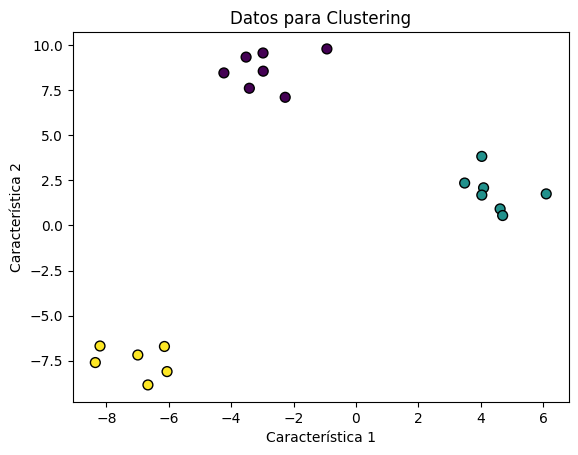

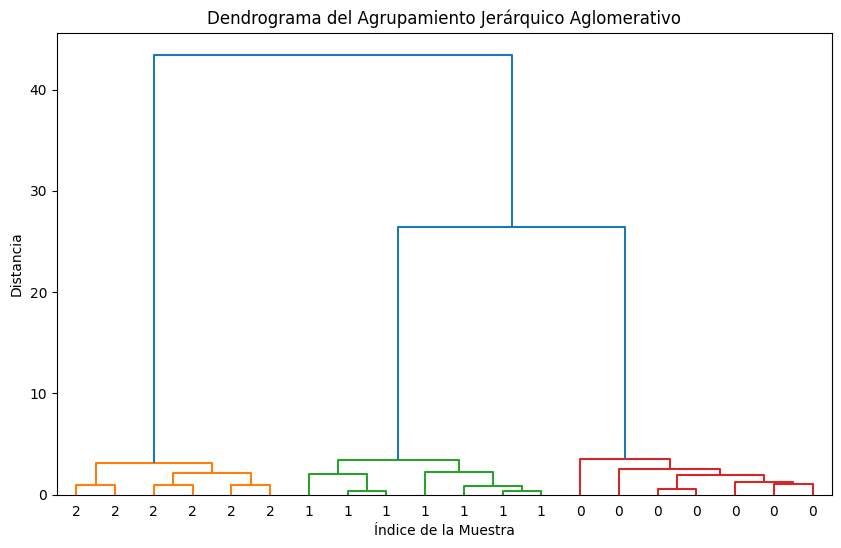

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar datos sintéticos para clustering
X, y = make_blobs(n_samples=20, centers=3, cluster_std=1.0, random_state=42)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k', linewidth=1)
plt.title('Datos para Clustering')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Aplicar el agrupamiento jerárquico aglomerativo
linkage_matrix = linkage(X, method='ward')  # Método de enlace: ward

# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=y, leaf_font_size=10, color_threshold=7.0)
plt.title('Dendrograma del Agrupamiento Jerárquico Aglomerativo')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia')
plt.show()

**Explicación del Código:**

- Generamos datos sintéticos usando `make_blobs` con tres centros para ilustrar tres grupos.
- Visualizamos los datos en un gráfico de dispersión.
- Aplicamos el agrupamiento jerárquico aglomerativo utilizando `linkage` con el método de enlace de Ward.
- Visualizamos el dendrograma resultante.

**Interpretación del Dendrograma:**

- Cada hoja del dendrograma representa un punto de datos individual.
- Las uniones en el dendrograma muestran cuándo y cómo se agrupan los puntos.
- La altura de cada unión indica la distancia entre los clústeres fusionados.

**Observaciones:**

- En el dendrograma, podemos cortar horizontalmente para obtener un número específico de clústeres.
- La altura de corte determina el número de clústeres.
- Cuanto más bajo sea el corte, más clústeres obtendremos.

El agrupamiento jerárquico aglomerativo es útil para entender la estructura jerárquica de los datos y puede ser especialmente útil cuando no conocemos de antemano el número de clústeres que queremos obtener.

| **Inicio** | **atrás 9** | **Siguiente 11** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./9_Machine_Learning.ipynb)| [⏩](./11_Machine_Learning.ipynb)